# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


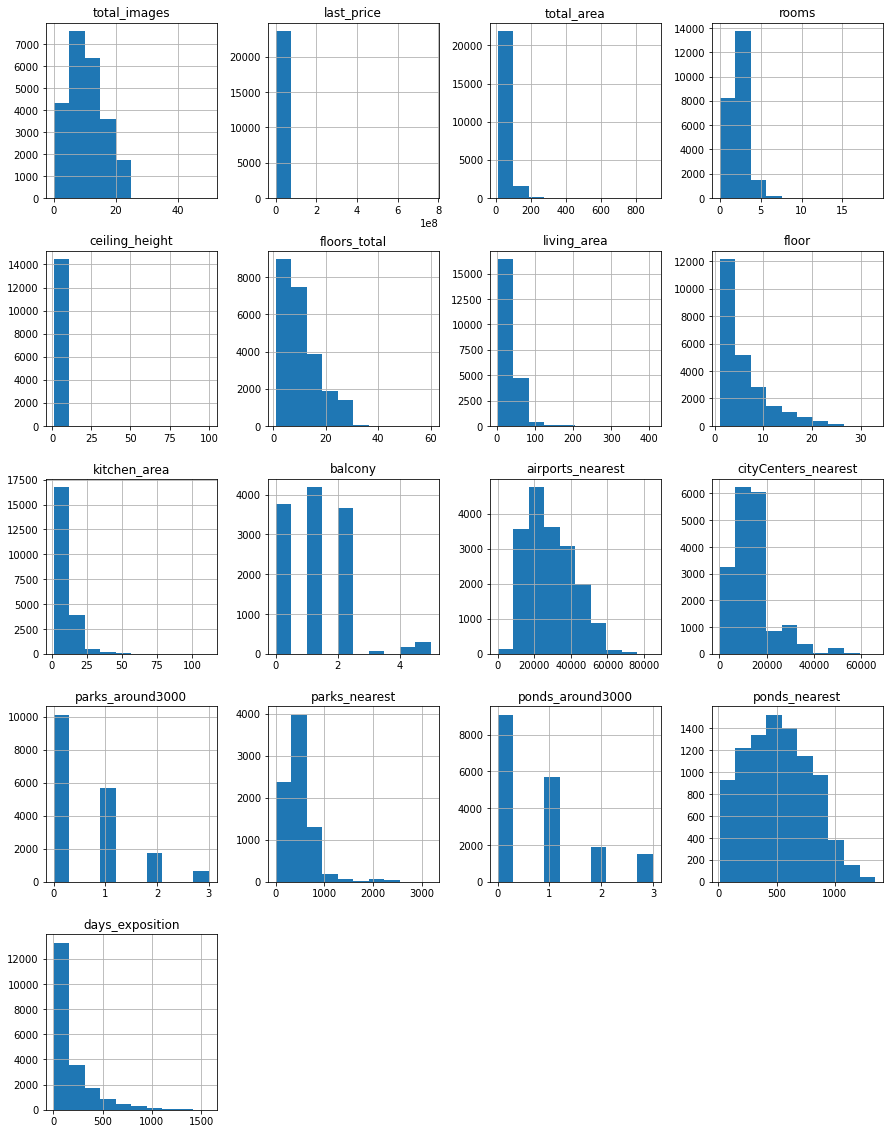

In [1]:
import pandas as pd
from IPython.display import display
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')
print(data.info()) #Выведем основную информацию о датафрейме
data.hist(figsize=(15, 20)); #построим общие гистограммы
data.head(15)
data.isna().sum().sort_values(ascending=True)
display(data)

Больше всего пропусков в столбцах(is_apartment,parks_nearest,ponds_nearest,balcony)
Путсые значения в is_apartments и balcony можно заполнить False и 0 соответсвенно, предположим что н количесвто людей не могуть понять что такое апартаменты, а в с balcony , предположим что просто нет балкона и мы моджем заполнить пропуски 0

ceiling_high(высота потолков) - можем предположить что отсутсвие значений может быть из за того,что людям просто лень замерять потолки

airports_nearest, cityCenters_nearest - оставлю без изменений, так как сложно судить такую информацию

days_exposition - предположим что квартиры еще не сняилсь с объявления

### Предобработка данных

In [2]:

#print(data['is_apartment'].value_counts())
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
#print(data['is_apartment'].head(10))
#print(data['ceiling_height'].head(10))
#print(data['ceiling_height'].value_counts())

#print(data['balcony'].value_counts())
data['balcony'] = data['balcony'].fillna(0).astype('int')

 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['last_price'] = data['last_price'].astype('int')

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#print(data.isna().sum().sort_values(ascending=False))
#print(data.duplicated().sum())

#print(data['locality_name'].unique())
#if 'посёлок' in row['locality_name']:
    #row['locality_name'].replace('посёлок', '')
    #return a + row['locality_name'] 
#elif 'поселок'in row['locality_name']:
   # row['locality_name'].replace('поселок', '')
   # return a + row['locality_name'] 
#print(data['locality_name'].unique())
a = ['городской посёлок','поселок','посёлок','деревня','поселок городского типа',
     'посёлок городского типа','село','городской поселок','городской поселок','поселок станции',
     'садоводческое некоммерческое товарищество','городского типа','при железнодорожной станции','садовое товарищество',
     'коттеджный','городской','станции']
b =  ''
data['locality_name'] = data['locality_name'].replace(a ,b , regex=True)
#print(data['locality_name'].unique())
data.loc[data['ceiling_height'] >19, 'ceiling_height'] = data['ceiling_height'] / 10
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

print(data.isna().sum())
sum_total = data['total_area'].sum()
print(sum_total)
sum_ = data['kitchen_area'].sum() + data['living_area'].sum()
print(sum_)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64
1430202.6800000002
1055278.9915119999


Преобразовали данные, смогли выявить некотрые аномаии в стобце ceiling_height,в нескольких столбцах поменяли тип данных, чтобы легче было делать рассчеты. В столбце kitchen_area заполнили пропуски медианным значением. Заполнили пропуски там, где это было возможно и понятно. Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты. 

я думаю недостающая площадь как раз скалдывается за счет балконов и прочих кв метров, которые не учитывались при living_area и kitchen_area

### Посчитайте и добавьте в таблицу новые столбцы

In [3]:
data['price_one_kv_metr'] = (data['last_price'] / data['total_area'])
#print(data['price_one_kv_metr'])
#print(data['first_day_exposition'])
data['weekday'] = data['first_day_exposition'].dt.weekday
#print(data['weekday'])
data['month'] = data['first_day_exposition'].dt.month
#print(data['month'])
data['year'] = data['first_day_exposition'].dt.year
#print(data['year'])
#print(data['floor'])
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний' 
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
#print(data['floor_type'])

data['km_cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000)

print(data['km_cityCenters_nearest'])

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: km_cityCenters_nearest, Length: 23699, dtype: float64


### Проведите исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

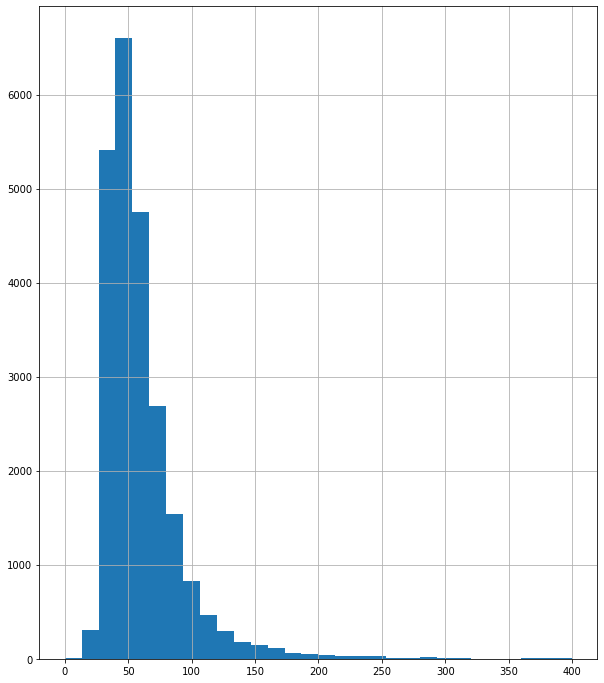

In [4]:
data['total_area'].hist(bins=30, range=(0,400),figsize=(10, 12))
data['total_area'].describe()


В среднем общая площадь квартиры составляет 60 кв м

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

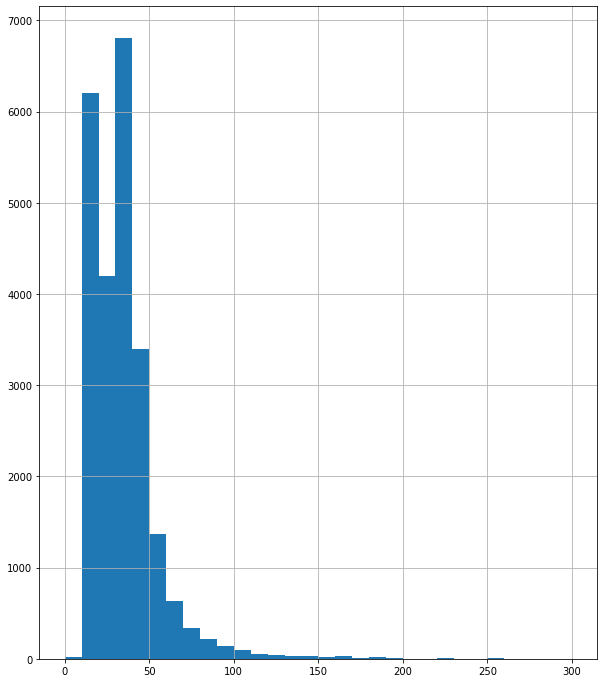

In [5]:
data['living_area'].hist(bins = 30, range=(0,300),figsize=(10, 12))
data['living_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

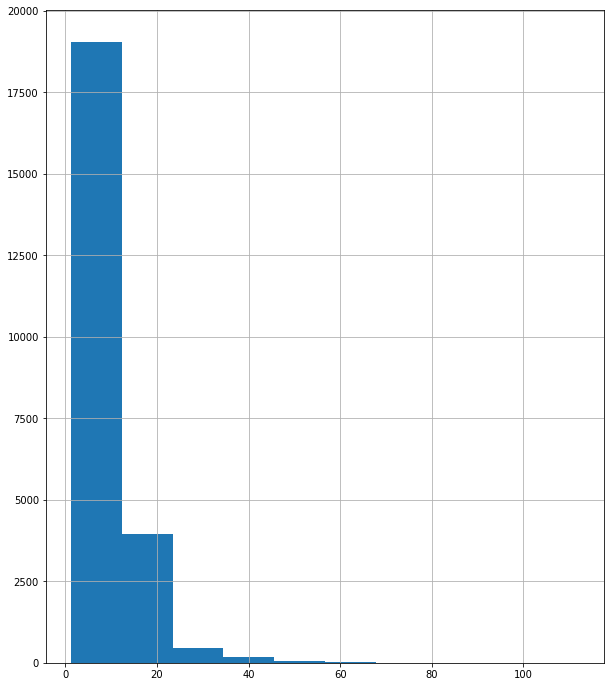

In [6]:
data['kitchen_area'].hist(figsize=(10, 12))
data['kitchen_area'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

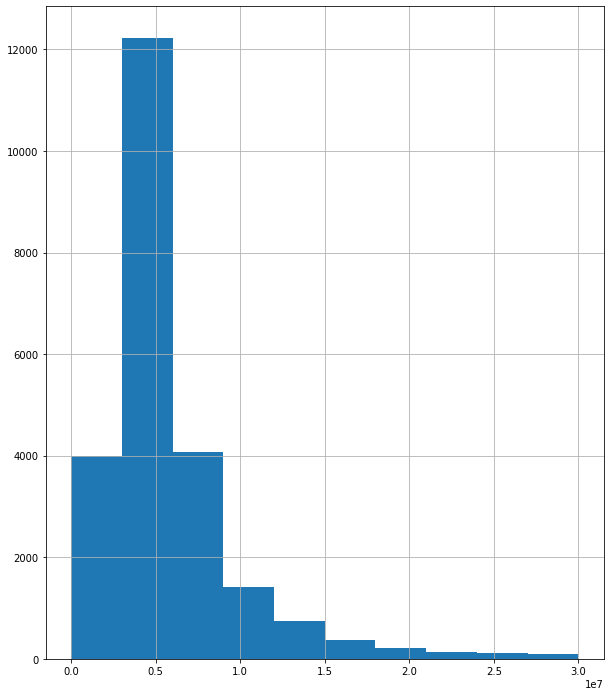

In [7]:
data['last_price'].hist(range=(0,30000000),figsize=(10, 12))
data['last_price'].describe()

В среднем общая стоимостть квартиры на рынке составляет 6,5 - 7 млн

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

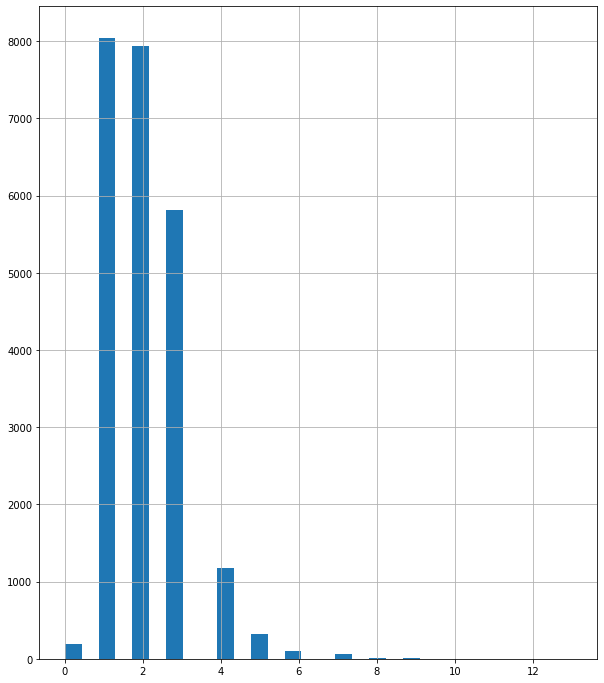

In [8]:
data['rooms'].hist(bins= 30, range=(0, 13),figsize=(10, 12))
data['rooms'].describe()

Большиство квартир имеют 1 или 2 комнаты, но есть и малая часть квартир с 5-ю и больше комнатами

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

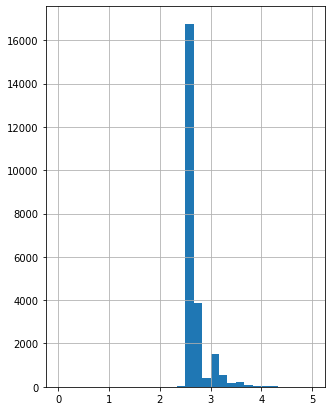

In [9]:
data['ceiling_height'].hist(bins=30, range=(0,5),figsize=(5, 7))
data['ceiling_height'].describe()

В среднем квартиры имеют потолки высотой 2,7

<AxesSubplot:>

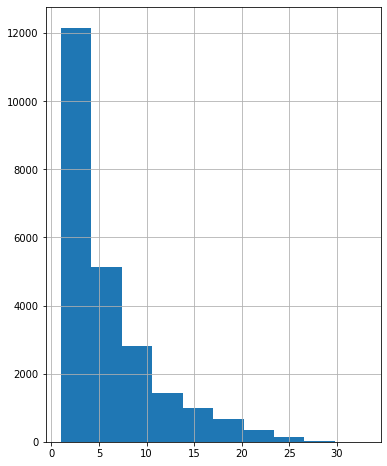

In [10]:
data['floor'].hist(figsize=(6, 8))

<AxesSubplot:>

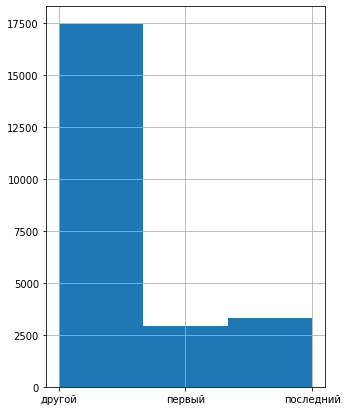

In [11]:
data['floor_type'].hist(bins=3,figsize=(5, 7))

<AxesSubplot:>

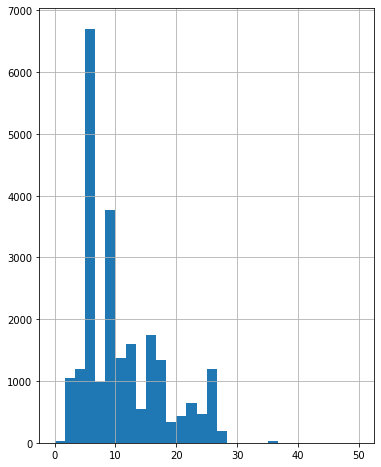

In [12]:
data['floors_total'].hist(bins = 30, range=(0,50),figsize=(6, 8))

Большиство квартир продаются в домах, где ментше 20 этажей

<AxesSubplot:>

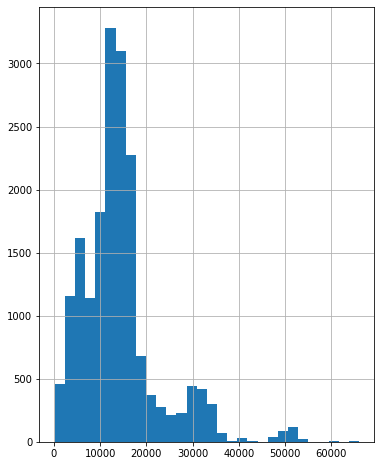

In [13]:
data['cityCenters_nearest'].hist(bins=30, figsize=(6, 8))

Большая часть квартир находится в 20 км от центра

<AxesSubplot:>

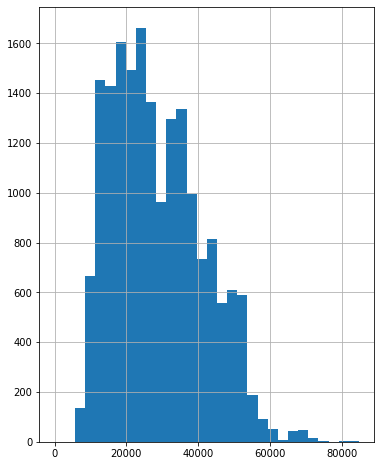

In [14]:
data['airports_nearest'].hist(bins=30, figsize=(6, 8))

Большая часть квартир имеют аэропорт в пределах 40 км

<AxesSubplot:>

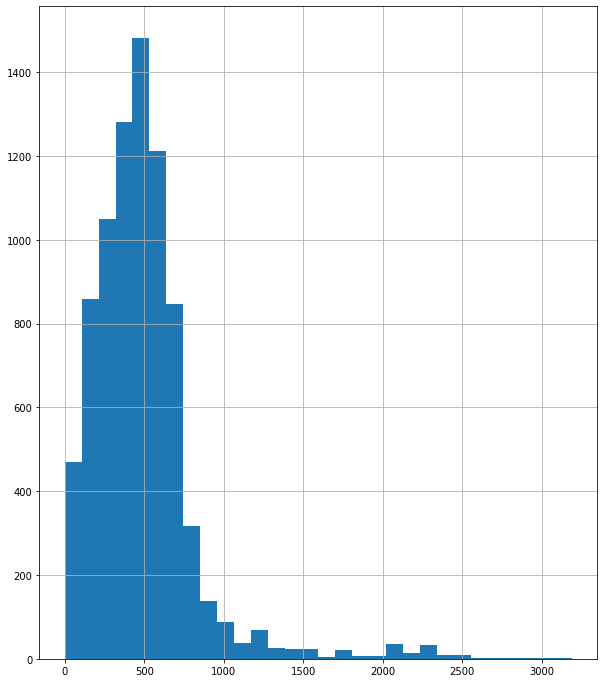

In [15]:
data['parks_nearest'].hist(bins=30, figsize=(10, 12))

80% квартир могут похвастаться наличием парка прям около дома или в ближайшем километре от дома

<AxesSubplot:>

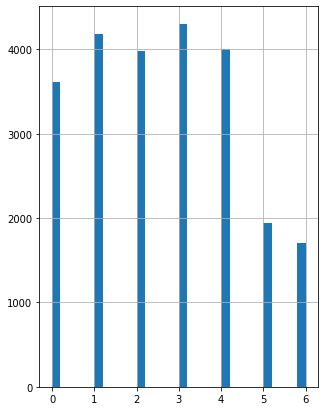

In [16]:
data['weekday'].hist(bins= 30, range=(0,6),figsize=(5, 7))

<AxesSubplot:>

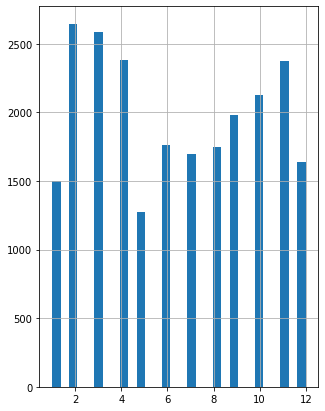

In [17]:
data['month'].hist(bins = 30 ,figsize=(5, 7))

В выходные дни меньеш всего публикаций, такая анамалия замечается и в середине года,перед летом

count    19999.000000
mean       177.853093
std        216.497391
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

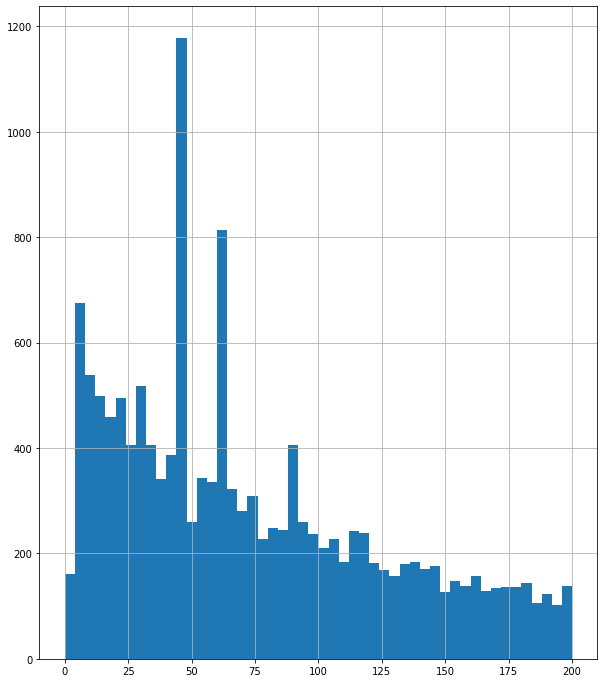

In [39]:
data['days_exposition'].hist(bins=50,range=(0,200),figsize=(10, 12))

data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

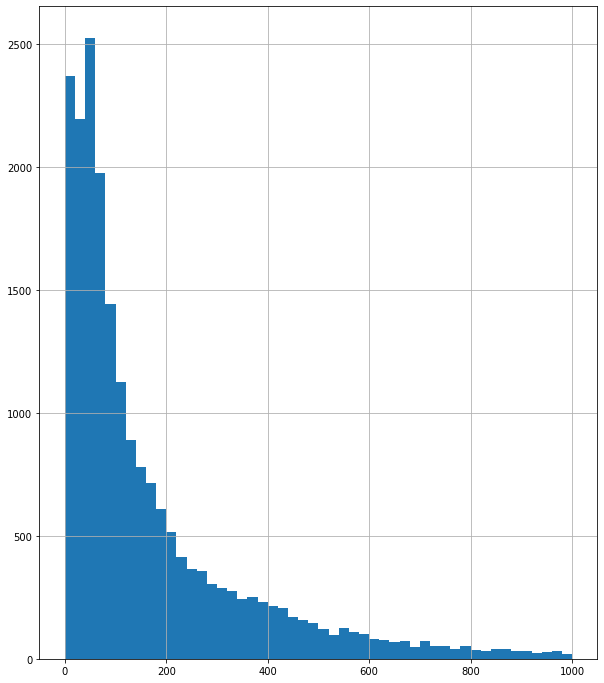

In [3]:
data['days_exposition'].hist(bins=50,range=(0,1000),figsize=(10, 12))
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

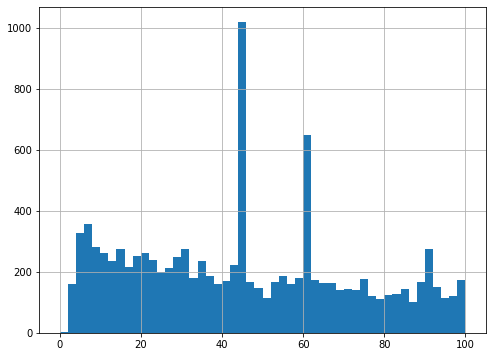

In [2]:
data['days_exposition'].hist(bins=50,range=(0,100),figsize=(8, 6))
data['days_exposition'].describe()

Похоже, что подавляющее число объявлений были закрыты в первый год после публикации. Среднее число дней до снятия составляет 180 дней, а медианное 95 дня.

быстыре продажи можно считать квартиры которые продались в течении 45 дней. Долгими можно считать квартиры которые не продаются 232+ дней, можно преположить что эти квартиры находятся в элитном диапазоне цен, которые доступны меньшему количесвто человек, чем среднестатичтическая квартира допустим в новостройке. Выбивающиеся значения, я предположу что это снятие квартир с продаж каждые 15-20 дней, думаю что люди забывают снять квартиры с продаж или этим занимается специальный человек который раз в 15-20 дней снимает проданные квартиры с продаж.

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> ВОт теперь я с тобой согласен!

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

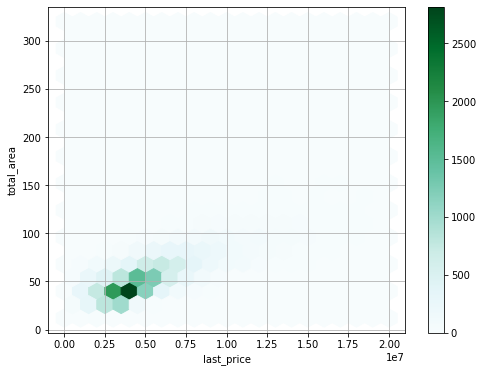

In [19]:
data = data.query('last_price < 20000000')
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Зависимость довольно значимая, хоть и разброс достаточно велик.

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

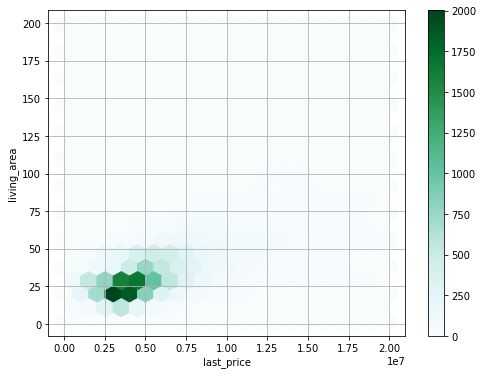

In [20]:
data.plot(x='last_price', y='living_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

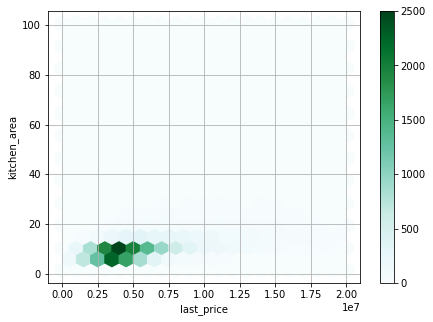

In [21]:
data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=20, figsize=(7, 5), sharex=False, grid=True)

<AxesSubplot:xlabel='rooms'>

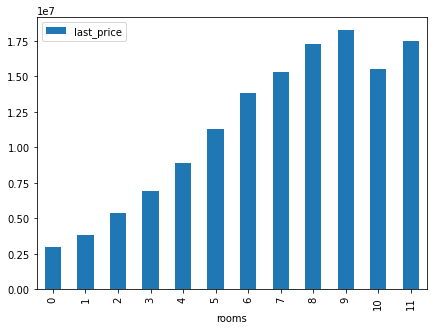

In [22]:
data.pivot_table(index='rooms', values='last_price').plot(kind='bar',figsize=(7,5))


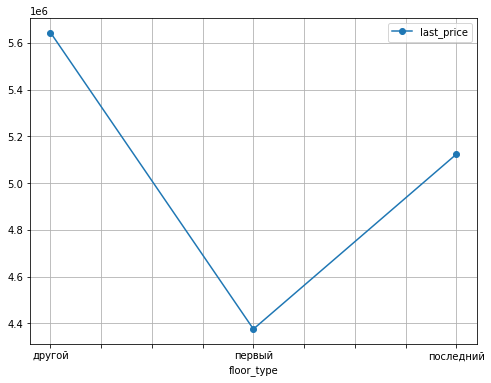

In [23]:
(data.pivot_table(index='floor_type', values='last_price').
 plot(grid=True, style='o-',figsize=(8, 6)));

<AxesSubplot:xlabel='weekday'>

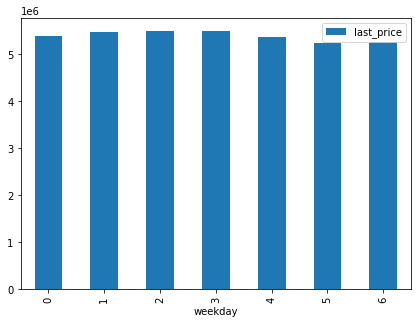

In [24]:
data.pivot_table(index='weekday', values='last_price').plot(kind='bar',figsize=(7,5))


<AxesSubplot:xlabel='month'>

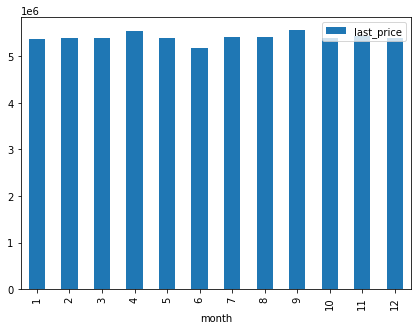

In [25]:
data.pivot_table(index='month', values='last_price').plot(kind='bar',figsize=(7,5))


<AxesSubplot:xlabel='year'>

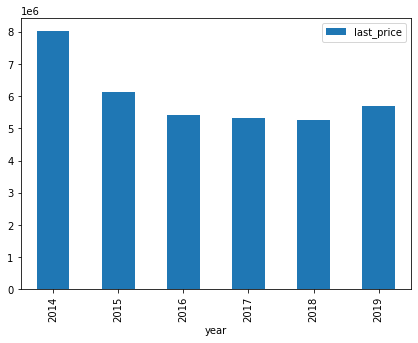

In [26]:
data.pivot_table(index='year', values='last_price').plot(kind='bar',figsize=(7,5))


Нет взаимосвязи. Корреляция стремится к нулю.

In [27]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_kv_metr,weekday,month,year,floor_type,km_cityCenters_nearest
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,NaN,0.0,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,0.0,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,30.0,12,False,...,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой,10.0


In [43]:
price = data.pivot_table(index='locality_name',values='price_one_kv_metr',aggfunc=['count','mean'])
price.columns = ['count', 'mean']
price = price.sort_values('count', ascending=False).head(10)

print(price)

                 count           mean
locality_name                        
Санкт-Петербург  15017  108608.057791
 Мурино            556   85681.762601
 Шушары            440   78677.364217
Всеволожск         397   67214.252635
Пушкин             360  101788.572053
Колпино            337   75333.295801
 Парголово         327   90175.913458
Гатчина            307   68746.146763
 Кудрово           299   92473.547576
Выборг             237   58141.909153


In [44]:
print(price[price['mean']==price['mean'].max()])
print(price[price['mean']==price['mean'].min()])

                 count           mean
locality_name                        
Санкт-Петербург  15017  108608.057791
               count          mean
locality_name                     
Выборг           237  58141.909153


Разница больше чем в 10 раз

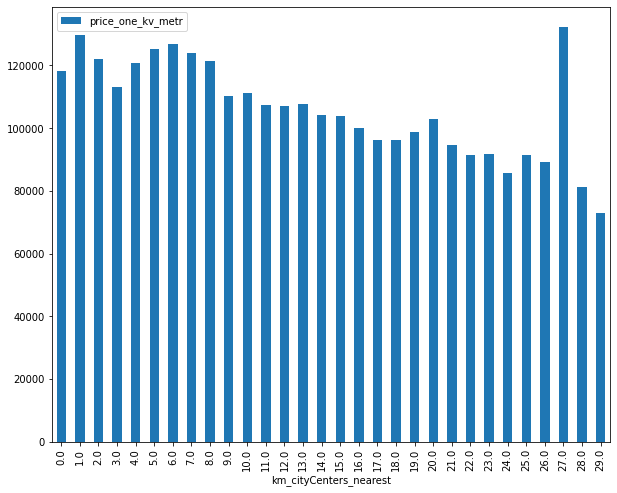

In [31]:
price_in_spb = data.query('locality_name == "Санкт-Петербург"')
price_in_spb = price_in_spb.pivot_table(index='km_cityCenters_nearest', values='price_one_kv_metr').plot(kind='bar',figsize=(10,8))

                 
                  

Чем ближе к центру - тем выше цена,Корреляция обратная, слабая видимо из-за выброса.

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

Изучили данные, поменяли типы данных, удалили неявные дубликаты в населенных пунктах, узнали когда люди меньше всего работают (выставляют объявления), сделали выводы о цене. Добавили новые таблицы: цена за квадратныц метр, двевыли дату по дню недели,месяцу и году. Были добавлены категории этажей. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. 
Выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.
Санкт-Петербург оказался городом с самым дорогим квадратным метром, следовало ожидать. И больше всего объявлений о прадажи кварти имеено в Санкт-Петербурге
Больше всего на стоимость как и следовало ожидать влияет общая площадь (показатель обладает самой высокой корреляцией).
Очевидно видно и то что, на цену влияет и количество комнат.
На удивление цена за квадратный метр обратно коррелируется относительно расстояния до центра, и меньше, чем упомянутрая ранее.
